#**ᲞᲠᲐᲥᲢᲘᲙᲣᲚᲘ ᲓᲐᲕᲐᲚᲔᲑᲐ #2**
---

## **ვადა (deadline): 4 ნოემბერი 19:00**

---

თითოეული დავალება ფასდება შესაბამისი ქულით, რაც ჯამში შეადგენს **5 ქულას**

---


# **ამოცანა: ფეხბურთელების PCA და კლასტერული ანალიზი**

---

## **📊 პრობლემა**

საფეხბურთო კლუბს აქვს **500 მოთამაშის მონაცემები** 12 უნარით (სიჩქარე, დარტყმა, გადაცემა და ა.შ.).

**გამოწვევები:**
- 12 პარამეტრის ერთდროულად ანალიზი რთულია
- რა "სტილები/არქეტიპები" არსებობს მოთამაშეებში?
- ვინ არის "დაუფასებელი" (undervalued)?
- ვინ არის უნიკალური/არასტანდარტული?

---

## **🎯 მიზანი**

**PCA:** 12 უნარი → 2-3 კომპონენტი (ვიზუალიზაციისთვის)  
**K-means:** მოთამაშეთა დაჯგუფება არქეტიპებად  
**DBSCAN:** უნიკალური მოთამაშეების პოვნა (outliers)

---

## **📁 მონაცემები**

**ფაილი:** [players_data.csv](https://drive.google.com/file/d/1R3u9Xyg7EkPdBjMl3lfV5hBCnHIzrdW2/view?usp=drive_link) - მოთამაშეთა მახასიათებლები და საბაზრო ფასები

**500 მოთამაშე:** 80 მეკარე, 150 მცველი, 150 ნახევარმცველი, 120 თავდამსხმელი

| **ველი** | **აღწერა** |
|-----------|-------------|
| `Player_ID` | ID (1-500) |
| `Name` | სახელი |
| `Position` | Goalkeeper/Defender/Midfielder/Forward |
| `Age` | ასაკი (18-35) |
| `Market_Value` | ფასი (€M) |
| `Pace` | სიჩქარე (1-100) |
| `Shooting` | დარტყმა (1-100) |
| `Passing` | გადაცემა (1-100) |
| `Dribbling` | დრიბლინგი (1-100) |
| `Defending` | დაცვა (1-100) |
| `Physical` | ფიზიკური ძალა (1-100) |
| `Positioning` | პოზიციონირება (1-100) |
| `Vision` | ხედვა (1-100) |
| `Ball_Control` | ბურთის კონტროლი (1-100) |
| `Stamina` | გამძლეობა (1-100) |
| `Aggression` | აგრესიულობა (1-100) |
| `Reactions` | რეაქცია (1-100) |

---

## **ეტაპები**

### **1. მონაცემების ჩატვირთვა, მოკვლევითი ანალიზი და მომზადება**

```python
df = pd.read_csv('players_data.csv')
```
- მოკვლევითი ანალიზი
- სტანდარტიზაცია (StandardScaler)

### **2. PCA (განზომილების შემცირება)**
- PCA → 2D/3D
- Scree Plot (ვარიაციული ანალიზი)
- Component Loadings (რა ნიშნავს PC1/PC2?)

### **3. K-means (არქეტიპების პოვნა)**
- Elbow + Silhouette → ოპტიმალური K
- K-means გამოყენება
- კლასტერების პროფილები (თბური რუკა)
- კლასტერების და პოზიციების შეპირისპირება

### **4. DBSCAN (უნიკალური მოთამაშეები)**
- ამოვარდნილი მნიშვნელობების (Outlier-ების) იდენტიფიკაცია
- არასტანდარტული ტალანტების გამოვლენა

---

## **მოსალოდნელი შედეგები**

**PCA:** PC1 ≈ "თავდამსხმელი vs დაცვითი", PC2 ≈ "ტექნიკური vs ფიზიკური"  
**K-means:** 4-8 არქეტიპი (თითოეულის უნიკალური პროფილი)  
**DBSCAN:** 20-40 outlier (პოტენციური game-changers)

---

## **სარგებელი**

- მოთამაშეთა სტილების იდენტიფიკაცია  
- "გვინდა X-ის მსგავსი" → იგივე კლასტერიდან იაფი ალტერნატივები  
- დაუფასებლების პოვნა კონკრეტულ არქეტიპებში  
- უნიკალური ტალანტების აღმოჩენა

---


ბაზრის ანალიზი (EDA)


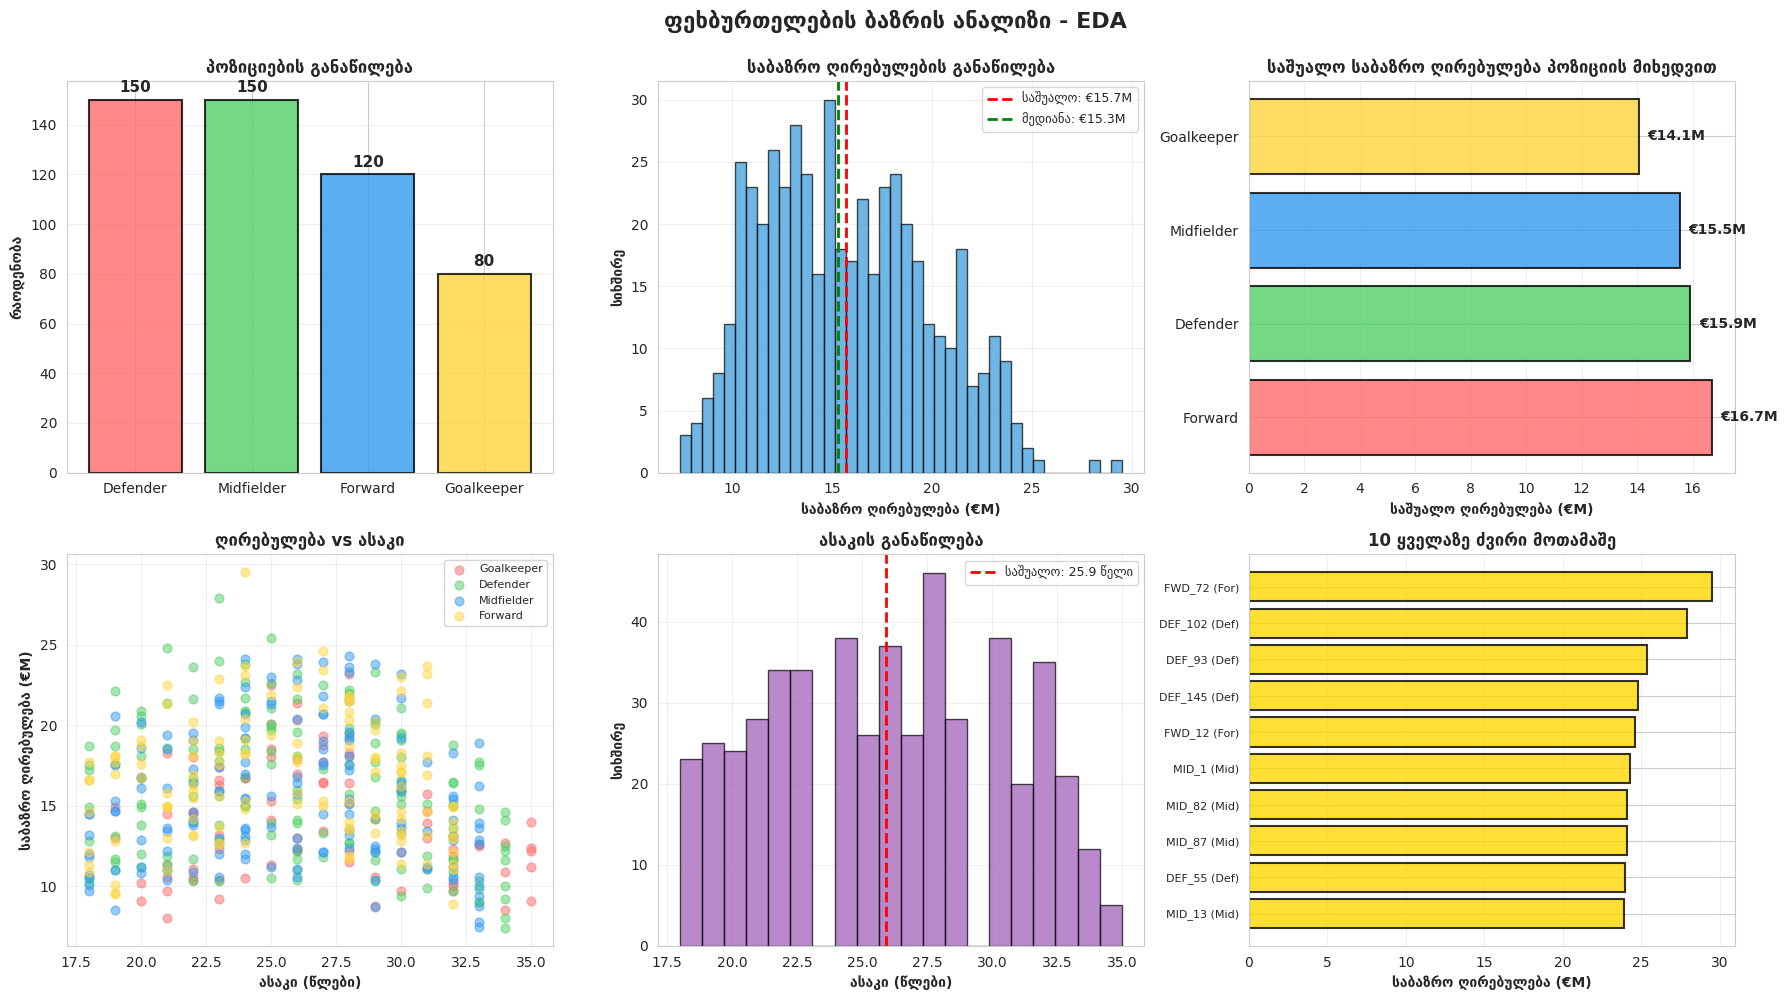


📊 მახასიათებლების კორელაციური ანალიზი...


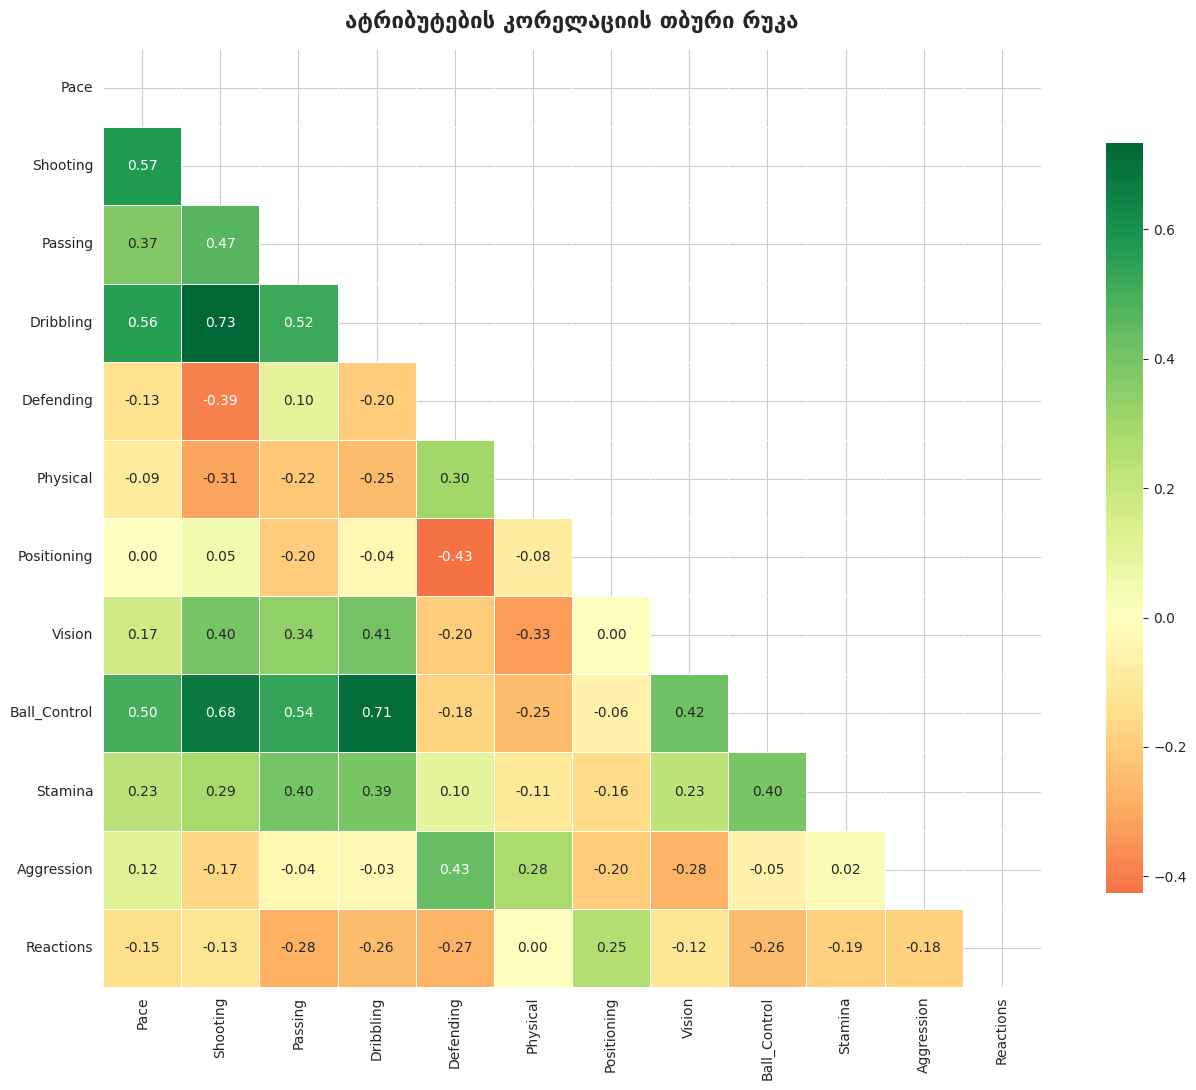


მონაცემების სტანდარტიზაცია
✅ 12-ვე ატრიბუტი სტანდარტიზებულია
   • Shape: (500, 12)
   • საშუალო: -0.0000000000 (≈0)
   • სტდ. გადახრა: 1.0000000000 (≈1)


In [1]:
#@title ## **მონაცემების ჩატვირთვა და შესწავლა: გაუშვით კოდი და შეისწავლეთ შედეგები**

# players_data.csv ფაილი ატვირთეთ კოლაბის რანთაიმში

# გაუშვით მოცემული კოდი

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# მონაცემთა მოკვლევითი ანალიზი - Exploratory Data Analysis (EDA)
print("\n" + "="*80)
print("ბაზრის ანალიზი (EDA)")
print("="*80)

df = pd.read_csv('players_data.csv')

# 12 ატრიბუტი (მოთამაშეების უნარები)
attributes = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending',
              'Physical', 'Positioning', 'Vision', 'Ball_Control',
              'Stamina', 'Aggression', 'Reactions']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. პოზიციების განაწილება
position_counts = df['Position'].value_counts()
colors_bar = ['#ff6b6b', '#51cf66', '#339af0', '#ffd43b']
axes[0, 0].bar(position_counts.index, position_counts.values,
              color=colors_bar, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0, 0].set_ylabel('რაოდენობა', fontweight='bold')
axes[0, 0].set_title('პოზიციების განაწილება', fontweight='bold', fontsize=12)
axes[0, 0].grid(alpha=0.3, axis='y')
for i, v in enumerate(position_counts.values):
    axes[0, 0].text(i, v + 3, str(v), ha='center', fontweight='bold', fontsize=11)

# 2. ბაზრის ღირებულების განაწილება
axes[0, 1].hist(df['Market_Value'], bins=40, color='#3498db', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(df['Market_Value'].mean(), color='red', linestyle='--',
                   linewidth=2, label=f"საშუალო: €{df['Market_Value'].mean():.1f}M")
axes[0, 1].axvline(df['Market_Value'].median(), color='green', linestyle='--',
                   linewidth=2, label=f"მედიანა: €{df['Market_Value'].median():.1f}M")
axes[0, 1].set_xlabel('საბაზრო ღირებულება (€M)', fontweight='bold')
axes[0, 1].set_ylabel('სიხშირე', fontweight='bold')
axes[0, 1].set_title('საბაზრო ღირებულების განაწილება', fontweight='bold', fontsize=12)
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(alpha=0.3)

# 3. საშუალო ფასი პოზიციის მიხედვით
position_value = df.groupby('Position')['Market_Value'].mean().sort_values(ascending=False)
axes[0, 2].barh(position_value.index, position_value.values,
               color=colors_bar, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0, 2].set_xlabel('საშუალო ღირებულება (€M)', fontweight='bold')
axes[0, 2].set_title('საშუალო საბაზრო ღირებულება პოზიციის მიხედვით', fontweight='bold', fontsize=12)
for i, v in enumerate(position_value.values):
    axes[0, 2].text(v + 0.3, i, f'€{v:.1f}M', va='center', fontweight='bold', fontsize=10)
axes[0, 2].grid(alpha=0.3, axis='x')

# 4. ღირებულება vs ასაკი
colors_map = {'Goalkeeper': '#ff6b6b', 'Defender': '#51cf66',
              'Midfielder': '#339af0', 'Forward': '#ffd43b'}
for position in df['Position'].unique():
    mask = df['Position'] == position
    axes[1, 0].scatter(df[mask]['Age'], df[mask]['Market_Value'],
                      label=position, alpha=0.5, s=40, color=colors_map[position])
axes[1, 0].set_xlabel('ასაკი (წლები)', fontweight='bold')
axes[1, 0].set_ylabel('საბაზრო ღირებულება (€M)', fontweight='bold')
axes[1, 0].set_title('ღირებულება vs ასაკი', fontweight='bold', fontsize=12)
axes[1, 0].legend(fontsize=8, loc='upper right')
axes[1, 0].grid(alpha=0.3)

# 5. ასაკის განაწილება
axes[1, 1].hist(df['Age'], bins=20, color='#9b59b6', alpha=0.7, edgecolor='black')
axes[1, 1].axvline(df['Age'].mean(), color='red', linestyle='--',
                   linewidth=2, label=f"საშუალო: {df['Age'].mean():.1f} წელი")
axes[1, 1].set_xlabel('ასაკი (წლები)', fontweight='bold')
axes[1, 1].set_ylabel('სიხშირე', fontweight='bold')
axes[1, 1].set_title('ასაკის განაწილება', fontweight='bold', fontsize=12)
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(alpha=0.3)

# 6. TOP-10 ყველაზე ძვირი
top10 = df.nlargest(10, 'Market_Value')[['Name', 'Position', 'Market_Value']]
axes[1, 2].barh(range(10), top10['Market_Value'].values, color='gold',
                alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1, 2].set_yticks(range(10))
axes[1, 2].set_yticklabels([f"{row['Name']} ({row['Position'][:3]})"
                            for _, row in top10.iterrows()], fontsize=8)
axes[1, 2].set_xlabel('საბაზრო ღირებულება (€M)', fontweight='bold')
axes[1, 2].set_title('10 ყველაზე ძვირი მოთამაშე', fontweight='bold', fontsize=12)
axes[1, 2].invert_yaxis()
axes[1, 2].grid(alpha=0.3, axis='x')

plt.suptitle('ფეხბურთელების ბაზრის ანალიზი - EDA', fontweight='bold', fontsize=16, y=0.995)
plt.tight_layout()
plt.show()

# კორელაციის თბური რუკა
print("\n📊 მახასიათებლების კორელაციური ანალიზი...")
plt.figure(figsize=(14, 11))
corr_matrix = df[attributes].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, mask=mask,
            fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title('ატრიბუტების კორელაციის თბური რუკა', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# სტანდარტიზაცია
print("\n" + "="*80)
print("მონაცემების სტანდარტიზაცია")
print("="*80)

X = df[attributes].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✅ {len(attributes)}-ვე ატრიბუტი სტანდარტიზებულია")
print(f"   • Shape: {X_scaled.shape}")
print(f"   • საშუალო: {X_scaled.mean():.10f} (≈0)")
print(f"   • სტდ. გადახრა: {X_scaled.std():.10f} (≈1)")

# **სავარჯიშო 1: ჩაატარეთ ძირითად კომპონენტთა ანალიზი (PCA) (1.5 ქულა)**

1. **PCA-ს გამოყენება და განზომილების შემცირება** (0.5 ქულა)
   - PCA გამოყენება 2D და 3D კომპონენტებისთვის
   - მოთამაშეების ვიზუალიზება 2D სივრცეში (PC1 vs PC2)

2. **ვარიაციის დიაგრამა (Scree Plot) და ახსნილი ვარიაციის ანალიზი** (0.5 ქულა)
   - ააგეთ ვარიაციის დიაგრამა (Scree Plot)
   - ვარიაციის კუმულაციური გრაფიკი (80%, 90% ხაზებით)
   - დაადგინეთ რამდენი კომპონენტია საჭირო ვარიაციის 80%-90%-ის ასახსნელად

3. **ატრიბუტების წონები (Component Loadings) და PC-ების ინტერპრეტაცია** (0.5 ქულა)
   - გამოთვალეთ PC1 და PC2-ის loadings-ები
   - ააგეთ სვეტოვანი დიაგრამები (რომელ ატრიბუტებს აქვს უდიდესი წონა)
   - ახსენით რას განსაზღვრავს PC1 და PC2 (მაგ: "შემტევი vs დაცვითი")


PCA-ს გამოყენება და განზომილების შემცირება (0.5 ქულა)

PCA 2D: 44.91% ვარიაცია
   • PC1: 29.21%
   • PC2: 15.70%

PCA 3D: 53.94% ვარიაცია
   • PC1: 29.21%
   • PC2: 15.70%
   • PC3: 9.03%

მოთამაშეების ვიზუალიზაცია 2D PCA სივრცეში...


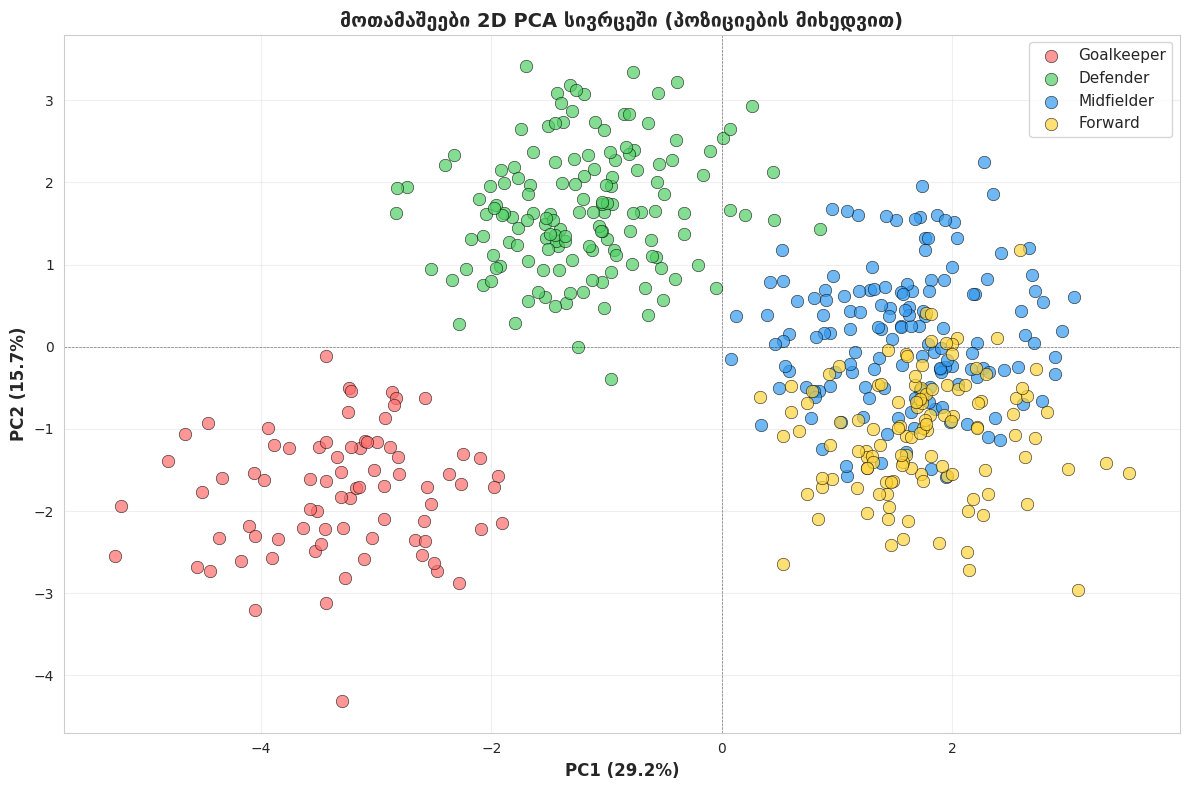


ვარიაციის დიაგრამა და ახსნილი ვარიაციის ანალიზი (0.5 ქულა)

ახსნილი ვარიაცია კომპონენტების მიხედვით:

PC1: █████████████████████████████                      29.21% (კუმულ: 29.21%)
PC2: ███████████████                                    15.70% (კუმულ: 44.91%)
PC3: █████████                                           9.03% (კუმულ: 53.94%)
PC4: ███████                                             7.42% (კუმულ: 61.36%)
PC5: ██████                                              6.48% (კუმულ: 67.85%)
PC6: █████                                               5.27% (კუმულ: 73.11%)
PC7: ████                                                4.99% (კუმულ: 78.11%)
PC8: ████                                                4.79% (კუმულ: 82.90%)


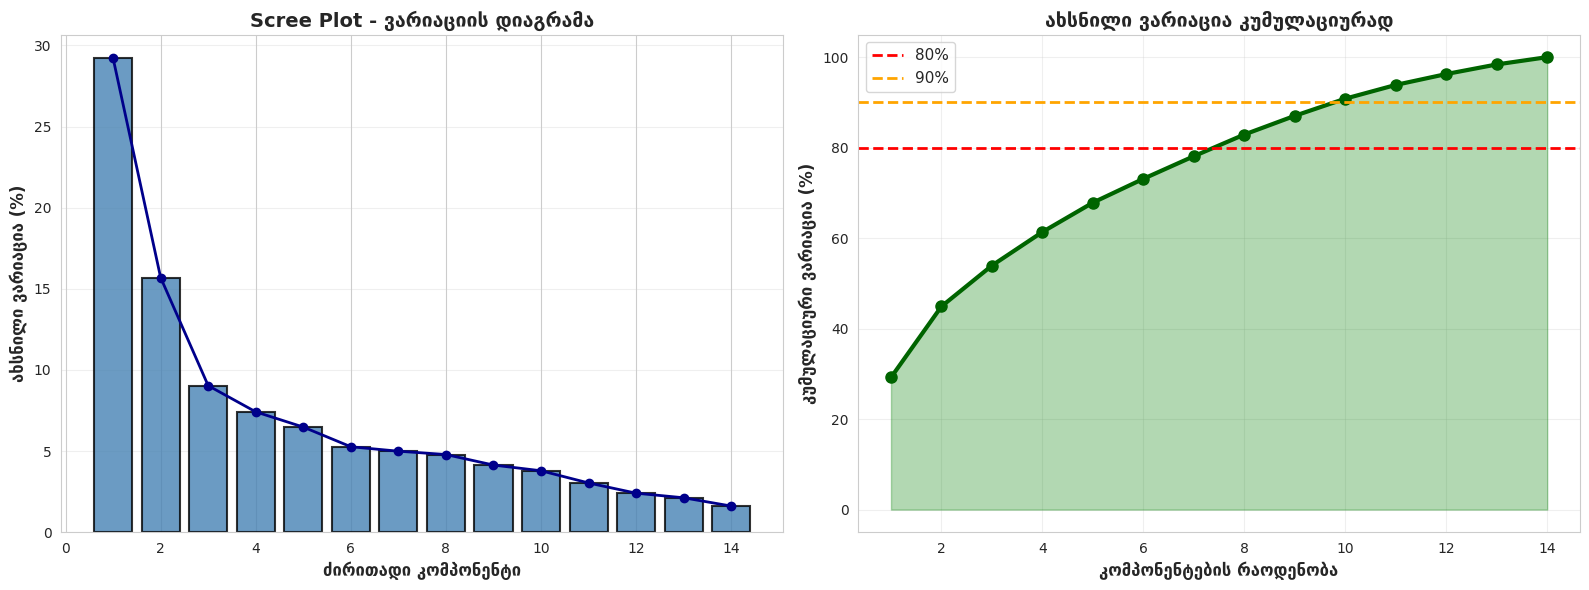


საჭირო კომპონენტების რაოდენობა:
   • 80% ვარიაციის ასახსნელად: 8 კომპონენტი
   • 90% ვარიაციის ასახსნელად: 10 კომპონენტი

დასკვნა:
   პირველი 2 კომპონენტი ხსნის 44.91% ვარიაციას,
   რაც საკმარისია მოთამაშეების ვიზუალიზაციისთვის 2D სივრცეში.


ატრიბუტების წონები (Component Loadings) და PC-ების ინტერპრეტაცია (0.5 ქულა)

ატრიბუტების წონები:

                PC1    PC2
Age          -0.046 -0.041
Pace          0.321  0.071
Shooting      0.418 -0.120
Passing       0.345  0.191
Dribbling     0.426  0.031
Defending    -0.129  0.541
Physical     -0.200  0.270
Positioning  -0.024 -0.427
Vision        0.285 -0.139
Ball_Control  0.419  0.040
Stamina       0.255  0.202
Aggression   -0.072  0.442
Reactions    -0.147 -0.357
Market_Value  0.115  0.095


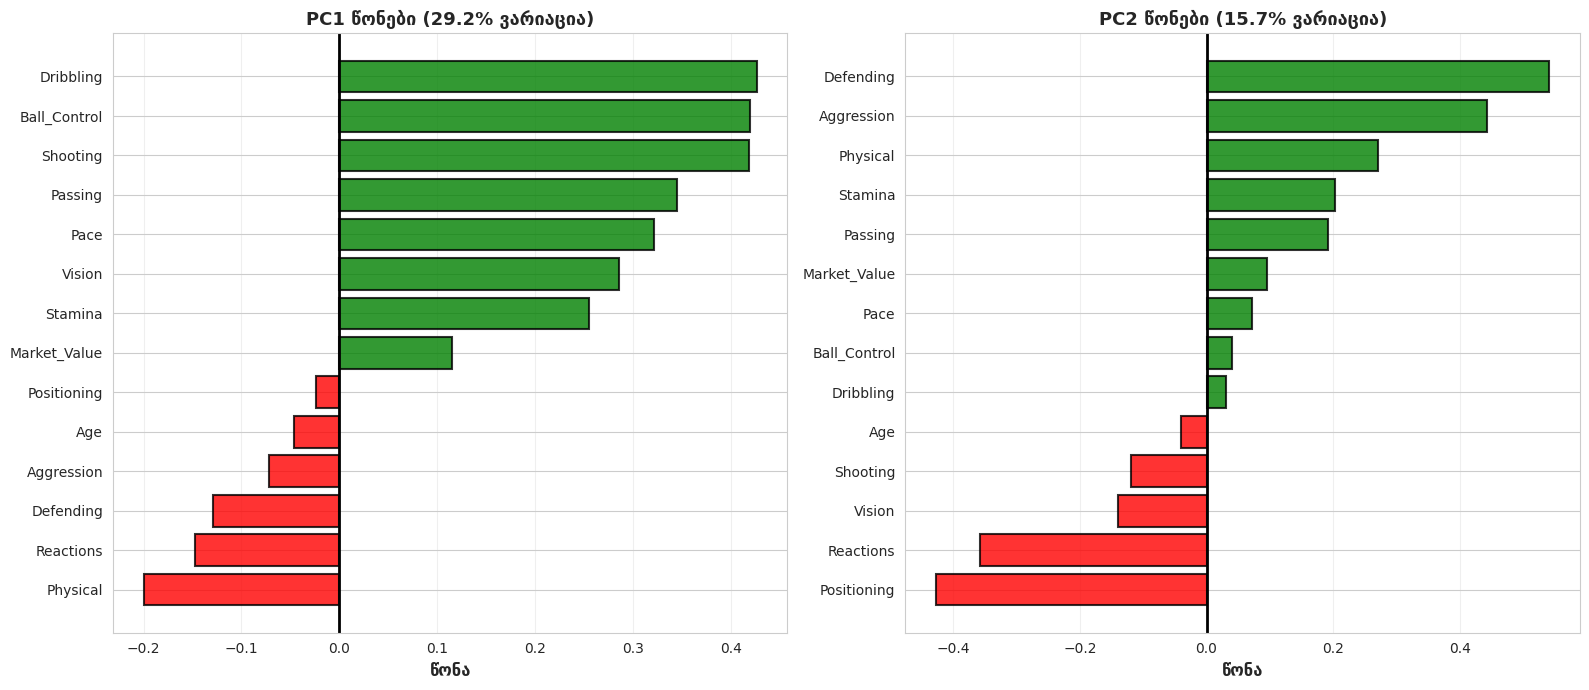


PC-ების ინტერპრეტაცია:


PC1 - TOP-3 დადებითი ატრიბუტი:
   • Dribbling: +0.426
   • Ball_Control: +0.419
   • Shooting: +0.418

PC1 - TOP-3 უარყოფითი ატრიბუტი:
   • Physical: -0.200
   • Reactions: -0.147
   • Defending: -0.129

PC2 - TOP-3 დადებითი ატრიბუტი:
   • Defending: +0.541
   • Aggression: +0.442
   • Physical: +0.270

PC2 - TOP-3 უარყოფითი ატრიბუტი:
   • Positioning: -0.427
   • Reactions: -0.357
   • Vision: -0.139


In [14]:
# დაასრულეთ კოდი

# ===============================================================
# PCA-ს გამოყენება და განზომილების შემცირება (0.5 ქულა)
# ===============================================================
print("\n" + "="*80)
print("PCA-ს გამოყენება და განზომილების შემცირება (0.5 ქულა)")
print("="*80)

pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

df = pd.read_csv("players_data.csv")

features = ['Age', 'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending',
            'Physical', 'Positioning', 'Vision', 'Ball_Control',
            'Stamina', 'Aggression', 'Reactions', 'Market_Value']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

X_pca_2d = pca_2d.fit_transform(df_scaled)
X_pca_3d = pca_3d.fit_transform(df_scaled)

df['PC1'] = X_pca_2d[:, 0]
df['PC2'] = X_pca_2d[:, 1]
df['PC3'] = X_pca_3d[:, 2]

print(f"\nPCA 2D: {pca_2d.explained_variance_ratio_.sum()*100:.2f}% ვარიაცია")
print(f"   • PC1: {pca_2d.explained_variance_ratio_[0]*100:.2f}%")
print(f"   • PC2: {pca_2d.explained_variance_ratio_[1]*100:.2f}%")

print(f"\nPCA 3D: {pca_3d.explained_variance_ratio_.sum()*100:.2f}% ვარიაცია")
print(f"   • PC1: {pca_3d.explained_variance_ratio_[0]*100:.2f}%")
print(f"   • PC2: {pca_3d.explained_variance_ratio_[1]*100:.2f}%")
print(f"   • PC3: {pca_3d.explained_variance_ratio_[2]*100:.2f}%")

print(f"\nმოთამაშეების ვიზუალიზაცია 2D PCA სივრცეში...")

plt.figure(figsize=(12, 8))
colors_map = {'Goalkeeper': '#ff6b6b', 'Defender': '#51cf66',
              'Midfielder': '#339af0', 'Forward': '#ffd43b'}

for position in df['Position'].unique():
    mask = df['Position'] == position
    plt.scatter(df[mask]['PC1'], df[mask]['PC2'],
                label=position, alpha=0.7, s=80,
                color=colors_map[position], edgecolor='black', linewidth=0.5)

plt.xlabel(f"PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)",
           fontweight='bold', fontsize=12)
plt.ylabel(f"PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)",
           fontweight='bold', fontsize=12)
plt.title('მოთამაშეები 2D PCA სივრცეში (პოზიციების მიხედვით)',
          fontweight='bold', fontsize=14)
plt.legend(fontsize=11, loc='best')
plt.grid(alpha=0.3)
plt.axhline(0, color='k', linestyle='--', linewidth=0.5, alpha=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()


# ===============================================================
# Scree Plot და ახსნილი ვარიაციის ანალიზი (0.5 ქულა)
# ===============================================================
print("\n" + "="*80)
print("ვარიაციის დიაგრამა და ახსნილი ვარიაციის ანალიზი (0.5 ქულა)")
print("="*80)

pca_full = PCA()
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\nახსნილი ვარიაცია კომპონენტების მიხედვით:\n")
for i in range(min(8, len(explained_variance))):
    bar = '█' * int(explained_variance[i] * 100)
    print(f"PC{i+1}: {bar:<50} {explained_variance[i]*100:5.2f}% "
          f"(კუმულ: {cumulative_variance[i]*100:5.2f}%)")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(range(1, len(explained_variance)+1), explained_variance*100,
            alpha=0.8, color='steelblue', edgecolor='black', linewidth=1.5)
axes[0].plot(range(1, len(explained_variance)+1), explained_variance*100,
             color='darkblue', marker='o', linewidth=2, markersize=6)
axes[0].set_xlabel('ძირითადი კომპონენტი', fontweight='bold', fontsize=12)
axes[0].set_ylabel('ახსნილი ვარიაცია (%)', fontweight='bold', fontsize=12)
axes[0].set_title('Scree Plot - ვარიაციის დიაგრამა', fontweight='bold', fontsize=14)
axes[0].grid(alpha=0.3, axis='y')

axes[1].plot(range(1, len(cumulative_variance)+1), cumulative_variance*100,
             marker='o', linewidth=3, markersize=8, color='darkgreen')
axes[1].fill_between(range(1, len(cumulative_variance)+1), cumulative_variance*100,
                     alpha=0.3, color='green')
axes[1].axhline(y=80, color='red', linestyle='--', linewidth=2, label='80%')
axes[1].axhline(y=90, color='orange', linestyle='--', linewidth=2, label='90%')
axes[1].set_xlabel('კომპონენტების რაოდენობა', fontweight='bold', fontsize=12)
axes[1].set_ylabel('კუმულაციური ვარიაცია (%)', fontweight='bold', fontsize=12)
axes[1].set_title('ახსნილი ვარიაცია კუმულაციურად', fontweight='bold', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"\nსაჭირო კომპონენტების რაოდენობა:")
print(f"   • 80% ვარიაციის ასახსნელად: {n_components_80} კომპონენტი")
print(f"   • 90% ვარიაციის ასახსნელად: {n_components_90} კომპონენტი")
print(f"\nდასკვნა:")
print(f"   პირველი 2 კომპონენტი ხსნის {pca_2d.explained_variance_ratio_.sum()*100:.2f}% ვარიაციას,")
print(f"   რაც საკმარისია მოთამაშეების ვიზუალიზაციისთვის 2D სივრცეში.")

# ===============================================================
# ატრიბუტების წონები (Component Loadings) და PC-ების ინტერპრეტაცია (0.5 ქულა)
# ===============================================================
print("\n" + "="*80)
print("\nატრიბუტების წონები (Component Loadings) და PC-ების ინტერპრეტაცია (0.5 ქულა)")
print("="*80)

components_df = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=features
).round(3)


print(f"\nატრიბუტების წონები:\n")
print(components_df)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

for idx, pc in enumerate(['PC1', 'PC2']):
    sorted_df = components_df.sort_values(pc, ascending=True)
    colors = ['red' if x < 0 else 'green' for x in sorted_df[pc]]

    axes[idx].barh(sorted_df.index, sorted_df[pc], color=colors,
                   alpha=0.8, edgecolor='black', linewidth=1.5)
    axes[idx].set_xlabel('წონა', fontweight='bold', fontsize=12)
    axes[idx].set_title(f'{pc} წონები ({pca_2d.explained_variance_ratio_[idx]*100:.1f}% ვარიაცია)',
                        fontweight='bold', fontsize=13)
    axes[idx].axvline(0, color='black', linestyle='-', linewidth=2)
    axes[idx].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print(f"\nPC-ების ინტერპრეტაცია:\n")

print(f"\nPC1 - TOP-3 დადებითი ატრიბუტი:")
for attr, val in components_df.nlargest(3, 'PC1')['PC1'].items():
    print(f"   • {attr}: {val:+.3f}")

print(f"\nPC1 - TOP-3 უარყოფითი ატრიბუტი:")
for attr, val in components_df.nsmallest(3, 'PC1')['PC1'].items():
    print(f"   • {attr}: {val:+.3f}")

print(f"\nPC2 - TOP-3 დადებითი ატრიბუტი:")
for attr, val in components_df.nlargest(3, 'PC2')['PC2'].items():
    print(f"   • {attr}: {val:+.3f}")

print(f"\nPC2 - TOP-3 უარყოფითი ატრიბუტი:")
for attr, val in components_df.nsmallest(3, 'PC2')['PC2'].items():
    print(f"   • {attr}: {val:+.3f}")

# **სავარჯიშო 2: ააგეთ K-means კლასტერიზების მოდელი (1.5 ქულა)**

1. **ოპტიმალური K-ის პოვნა** (0.5 ქულა)
   - Elbow Method-ის გამოყენება (Inertia vs K გრაფიკი)
   - Silhouette Score-ის გამოთვლა K=2-დან K=10-მდე
   - დაადგინეთ ოპტიმალური K საზომების საფუძველზე

2. **K-means-ის გაშვება და ვიზუალიზაცია** (0.5 ქულა)
   - K-means კლასტერიზაცია
   - კლასტერების ვიზუალიზაცია 2D PCA სივრცეში
   - კლასტერების ცენტრების ნახვა დიაგრამაზე

3. **კლასტერების პროფილების ანალიზი** (0.5 ქულა)
   - კლასტერების საშუალო ატრიბუტების თბური რუკა (Heatmap)
   - კლასტერების შეპირისპირება რეალურ პოზიციებთან (Confusion Matrix)
   - ახსენით თითოეული კლასტერის მახასიათებლები (TOP-3 უნარი)



ვიყენებთ სავარჯიშო 1-ის PCA შედეგებს

ოპტიმალური K-ს პოვნა (0.5 ქულა)


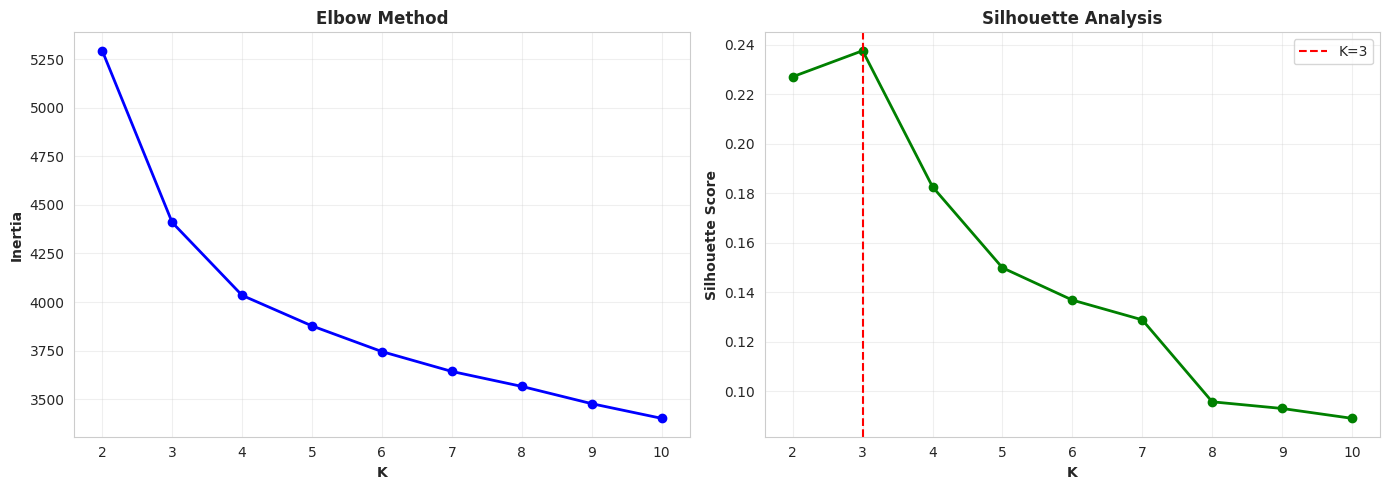

ოპტიმალური K: 3

K-means გაშვება და ვიზუალიზება (0.5 ქულა)
Silhouette: 0.237


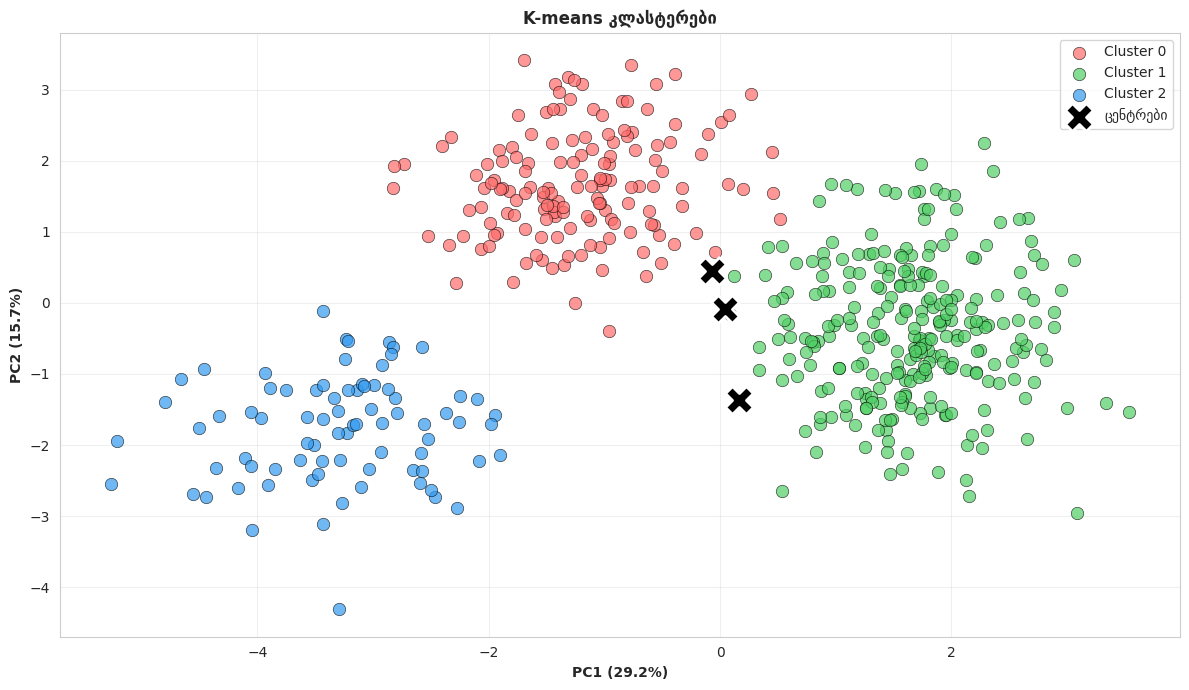


კლასტერების პროფილები (0.5 ქულა)


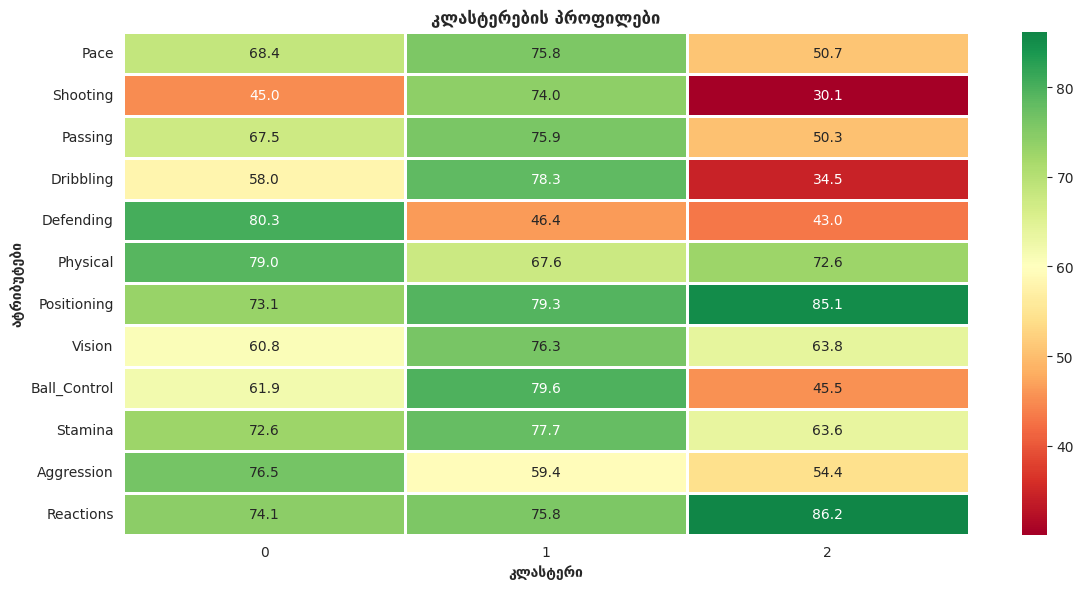

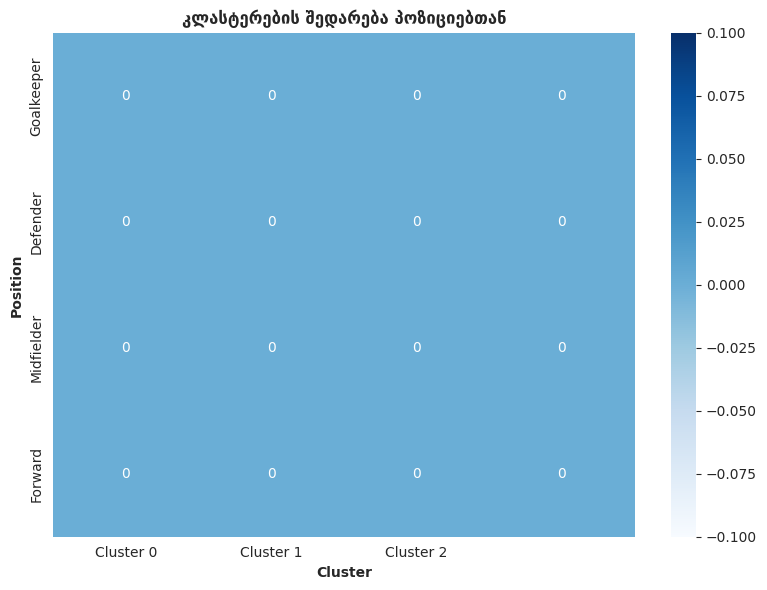


TOP-3 უნარები თითოეულ კლასტერში:

Cluster 0:
   • Defending: 80.34
   • Physical: 78.98
   • Aggression: 76.45

Cluster 1:
   • Ball_Control: 79.58
   • Positioning: 79.29
   • Dribbling: 78.33

Cluster 2:
   • Reactions: 86.15
   • Positioning: 85.09
   • Physical: 72.64


In [15]:
# დაასრულეთ კოდი

# შემოწმება: გვაქვს თუ არა სავარჯიშო 1-ის შედეგები
if 'X_pca_3d' not in dir():
    raise SystemExit("პირველ რიგში უნდა შესრულდეს სავარჯიშო 1 (PCA)!")

print(f"ვიყენებთ სავარჯიშო 1-ის PCA შედეგებს")

# ===============================================================
# ოპტიმალური K-ს პოვნა (0.5 ქულა)
# ===============================================================
print("\nოპტიმალური K-ს პოვნა (0.5 ქულა)")

K_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_temp.fit_predict(df_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Elbow + Silhouette Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2)
axes[0].set_xlabel('K', fontweight='bold')
axes[0].set_ylabel('Inertia', fontweight='bold')
axes[0].set_title('Elbow Method', fontweight='bold')
axes[0].grid(alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2)
best_k = K_range[np.argmax(silhouette_scores)]
axes[1].axvline(best_k, color='red', linestyle='--', label=f'K={best_k}')
axes[1].set_xlabel('K', fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontweight='bold')
axes[1].set_title('Silhouette Analysis', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"ოპტიმალური K: {best_k}")

# ===============================================================
# K-means გაშვება და ვიზუალიზება (0.5 ქულა)
# ===============================================================
print("\nK-means გაშვება და ვიზუალიზება (0.5 ქულა)")

K = best_k
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

print(f"Silhouette: {silhouette_score(df_scaled, df['Cluster']):.3f}")

# ვიზუალიზება (გამოვიყენებთ PC1, PC2)
plt.figure(figsize=(12, 7))
colors = ['#ff6b6b', '#51cf66', '#339af0', '#ffd43b', '#aa6cf9', '#ff922b', '#20c997', '#e64980', '#845ef7', '#ff6d00'][:K]

for i in range(K):
    mask = df['Cluster'] == i
    plt.scatter(df[mask]['PC1'], df[mask]['PC2'], label=f'Cluster {i}',
               alpha=0.7, s=80, color=colors[i], edgecolor='black', linewidth=0.5)

# ცენტრები (პირველი 2 კომპონენტი PCA სივრცეში)
centers_2d = kmeans.cluster_centers_[:, :2]
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='black', s=400,
           marker='X', edgecolor='white', linewidth=2, label='ცენტრები')

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold')
plt.title('K-means კლასტერები', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================================================
# კლასტერების პროფილები (0.5 ქულა)
# ===============================================================
print("\nკლასტერების პროფილები (0.5 ქულა)")

attributes = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending',
              'Physical', 'Positioning', 'Vision', 'Ball_Control',
              'Stamina', 'Aggression', 'Reactions']

# კლასტერების საშუალო ატრიბუტები
cluster_profiles = df.groupby('Cluster')[attributes].mean()

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profiles.T, annot=True, cmap='RdYlGn', center=60,
            fmt='.1f', linewidths=1)
plt.xlabel('კლასტერი', fontweight='bold')
plt.ylabel('ატრიბუტები', fontweight='bold')
plt.title('კლასტერების პროფილები', fontweight='bold')
plt.tight_layout()
plt.show()

# კლასტერების შედარება რეალურ პოზიციებთან (Confusion Matrix)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(df['Position'], df['Cluster'], labels=df['Position'].unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(K)],
            yticklabels=df['Position'].unique())
plt.xlabel('Cluster', fontweight='bold')
plt.ylabel('Position', fontweight='bold')
plt.title('კლასტერების შედარება პოზიციებთან', fontweight='bold')
plt.tight_layout()
plt.show()

# TOP-3 უნარები თითოეულ კლასტერში
print("\nTOP-3 უნარები თითოეულ კლასტერში:")
for i in range(K):
    print(f"\nCluster {i}:")
    top3 = cluster_profiles.loc[i].nlargest(3)
    for attr, val in top3.items():
        print(f"   • {attr}: {val:.2f}")


# **სავარჯიშო 3: გამოიყენეთ DBSCAN კლასტერიზების მეთოდი (2 ქულა)**

1. **DBSCAN-ის გამოყენება** (0.5 ქულა)
   - DBSCAN-ის გაშვება შესაბამისი eps და min_samples პარამეტრებით
   - კლასტერების და Outliers-ების რაოდენობის დადგენა
   - DBSCAN შედეგების ვიზუალიზაცია 2D PCA სივრცეში

2. **ამოვარდნილი მნიშვნელობების (Outlier-ების) იდენტიფიკაცია** (0.5 qულა)
   - იპოვეთ ყველა მოთამაშე რომელიც მონიშნულია Outlier-ად (cluster = -1)
   - TOP-10 უნიკალური/არასტანდარტული მოთამაშის ჩამოწერა
   - გააანალიზეთ რატომ არიან ისინი უნიკალურები

3. **არასტანდარტული ტალანტების ინტერპრეტაცია** (1 ქულა)
   - შეადარეთ Outlier-ები რეგულარულ კლასტერებს
   - ახსენით რით არიან ეს მოთამაშეები განსაკუთრებული
   - ბიზნეს კონტექსტი: როგორი ტიპები არიან Outlier-ები? იაფი და სუსტი, ძვირი და სუსტი თუ იაფი და ძლიერი?

---



ვიყენებთ სავარჯიშო 1-ის PCA შედეგებს

DBSCAN-ის გამოყენება (0.5 ქულა)

შედეგები:
  • კლასტერების რაოდენობა: 0
  • Outliers (ხმაური): 500 (100.0%)
  • კლასტერში მოთამაშეები: 0


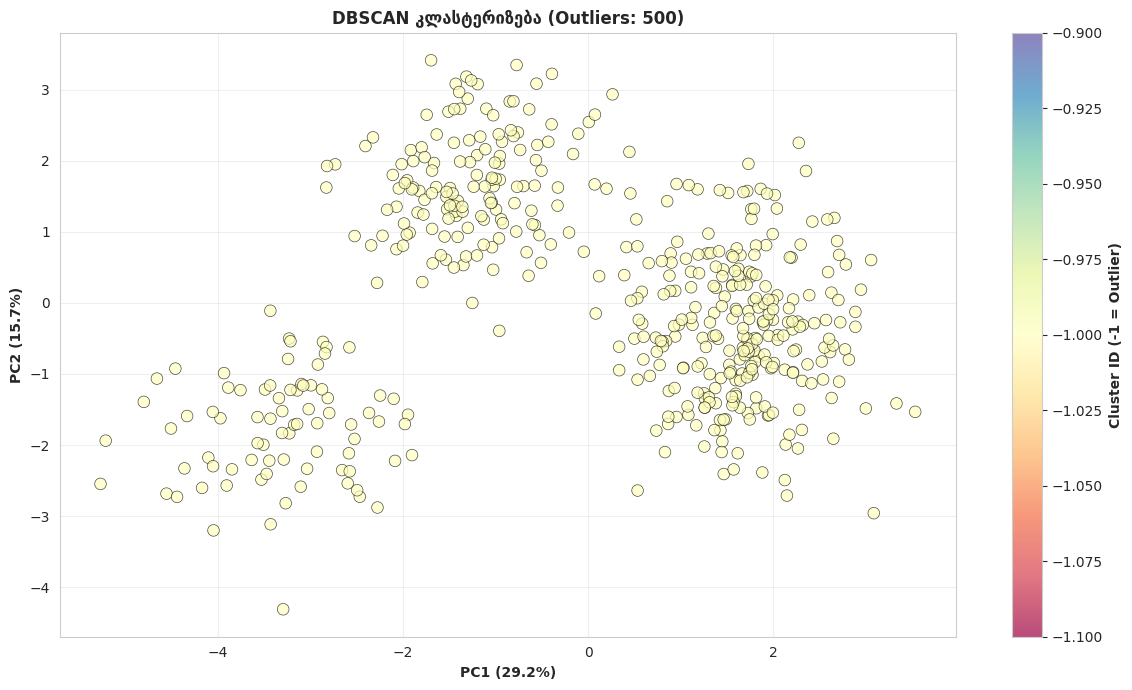


ამოვარდნილი მნიშვნელობების დადგენა (0.5 ქულა)

TOP-10 Outlier (ბაზრის ღირებულების მიხედვით):
  FWD_72       Forward      24 წლის  €29.5M
  DEF_102      Defender     23 წლის  €27.9M
  DEF_93       Defender     25 წლის  €25.4M
  DEF_145      Defender     21 წლის  €24.8M
  FWD_12       Forward      27 წლის  €24.6M
  MID_1        Midfielder   28 წლის  €24.3M
  MID_82       Midfielder   26 წლის  €24.1M
  MID_87       Midfielder   24 წლის  €24.1M
  DEF_55       Defender     23 წლის  €24.0M
  MID_13       Midfielder   27 წლის  €23.9M

სხვაობა რეგულარულ მოთამაშეებთან (TOP-5):
  Pace: ↓ nan ქულა
  Shooting: ↓ nan ქულა
  Passing: ↓ nan ქულა
  Dribbling: ↓ nan ქულა
  Defending: ↓ nan ქულა

ინტერპრეტაცია და ბიზნეს მიგნებები

Outliers-ების პოზიციები:
  • Defender: 150 (30.0%)
  • Midfielder: 150 (30.0%)
  • Forward: 120 (24.0%)
  • Goalkeeper: 80 (16.0%)

ყველაზე იაფი Outlier-ები (პოტენციური ბრილიანტები):
  DEF_112      Defender     €7.4M
  MID_2        Midfielder   €7.5M
  MID_18       Midfielder

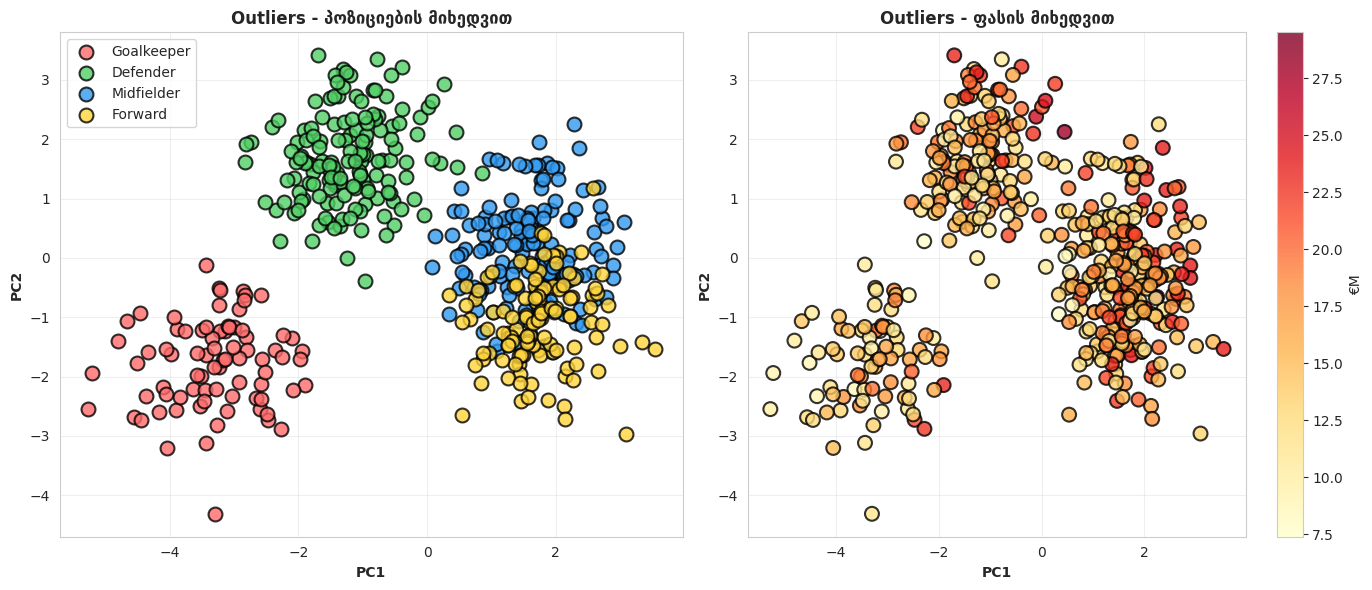


მაგალითი: DEF_112
     • პოზიცია: Defender
     • ფასი: €7.4M (იაფი!)
     • უნიკალური კომბინაცია - დეტალური ანალიზი საჭიროა


In [16]:
# დაასრულეთ კოდი

# შემოწმება: გვაქვს თუ არა სავარჯიშო 1-ის შედეგები
if 'X_pca_3d' not in dir():
    raise SystemExit("პირველ რიგში უნდა შესრულდეს სავარჯიშო 1 (PCA)!")

print(f"ვიყენებთ სავარჯიშო 1-ის PCA შედეგებს")

# ===============================================================
# DBSCAN-ის გამოყენება (0.5 ქულა)
# ===============================================================
print("\nDBSCAN-ის გამოყენება (0.5 ქულა)")

# DBSCAN პარამეტრები
dbscan = DBSCAN(eps=0.8, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# სტატისტიკა
n_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'].values else 0)
n_outliers = (df['DBSCAN_Cluster'] == -1).sum()

print(f"\nშედეგები:")
print(f"  • კლასტერების რაოდენობა: {n_clusters}")
print(f"  • Outliers (ხმაური): {n_outliers} ({n_outliers/len(df)*100:.1f}%)")
print(f"  • კლასტერში მოთამაშეები: {len(df) - n_outliers}")

# ვიზუალიზაცია (PC1, PC2)
plt.figure(figsize=(12, 7))
scatter = plt.scatter(df['PC1'], df['PC2'], c=df['DBSCAN_Cluster'],
                     s=70, cmap='Spectral', alpha=0.7,
                     edgecolor='black', linewidth=0.5)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold')
plt.title(f'DBSCAN კლასტერიზება (Outliers: {n_outliers})', fontweight='bold')
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster ID (-1 = Outlier)', fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================================================
# ამოვარდნილი მნიშვნელობების დადგენა (0.5 ქულა)
# ===============================================================
print("\nამოვარდნილი მნიშვნელობების დადგენა (0.5 ქულა)")

if n_outliers > 0:
    outliers = df[df['DBSCAN_Cluster'] == -1]

    print(f"\nTOP-10 Outlier (ბაზრის ღირებულების მიხედვით):")
    top10_outliers = outliers.nlargest(10, 'Market_Value')

    for idx, row in top10_outliers.iterrows():
        print(f"  {row['Name']:<12} {row['Position']:<12} {row['Age']} წლის  €{row['Market_Value']:.1f}M")

    # საშუალო ატრიბუტები: Outliers vs Regular
    attributes = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending',
                  'Physical', 'Positioning', 'Vision', 'Ball_Control',
                  'Stamina', 'Aggression', 'Reactions']

    outliers_mean = outliers[attributes].mean()
    regular_mean = df[df['DBSCAN_Cluster'] != -1][attributes].mean()
    diff = outliers_mean - regular_mean

    print("\nსხვაობა რეგულარულ მოთამაშეებთან (TOP-5):")
    top_diff = diff.abs().nlargest(5)
    for attr in top_diff.index:
        direction = "↑" if diff[attr] > 0 else "↓"
        print(f"  {attr}: {direction} {abs(diff[attr]):.1f} ქულა")
else:
    print("\nამოვარდნილები არ მოიძებნა!")

# ===============================================================
# ინტერპრეტაცია და ბიზნეს კონტექსტი (1 ქულა)
# ===============================================================
print("\nინტერპრეტაცია და ბიზნეს მიგნებები")

if n_outliers > 0:
    # Outliers-ების პოზიციების განაწილება
    outliers_positions = outliers['Position'].value_counts()
    print(f"\nOutliers-ების პოზიციები:")
    for pos, count in outliers_positions.items():
        print(f"  • {pos}: {count} ({count/n_outliers*100:.1f}%)")

    # ყველაზე იაფი Outlier-ები (პოტენციური ბრილიანტები)
    cheap_outliers = outliers.nsmallest(5, 'Market_Value')
    print(f"\nყველაზე იაფი Outlier-ები (პოტენციური ბრილიანტები):")
    for idx, row in cheap_outliers.iterrows():
        print(f"  {row['Name']:<12} {row['Position']:<12} €{row['Market_Value']:.1f}M")

    # ვიზუალიზაცია: Outliers vs Regular (2D PCA)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # მარცხენა: Outliers პოზიციების მიხედვით
    colors_map = {'Goalkeeper': '#ff6b6b', 'Defender': '#51cf66',
                  'Midfielder': '#339af0', 'Forward': '#ffd43b'}
    for position in df['Position'].unique():
        mask = outliers['Position'] == position
        if mask.sum() > 0:
            axes[0].scatter(outliers[mask]['PC1'], outliers[mask]['PC2'],
                          label=position, alpha=0.8, s=100,
                          color=colors_map[position], edgecolor='black', linewidth=1.5)

    axes[0].set_xlabel('PC1', fontweight='bold')
    axes[0].set_ylabel('PC2', fontweight='bold')
    axes[0].set_title('Outliers - პოზიციების მიხედვით', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # მარჯვენა: ფასის მიხედვით
    scatter = axes[1].scatter(outliers['PC1'], outliers['PC2'],
                             c=outliers['Market_Value'], s=100,
                             cmap='YlOrRd', alpha=0.8,
                             edgecolor='black', linewidth=1.5)
    axes[1].set_xlabel('PC1', fontweight='bold')
    axes[1].set_ylabel('PC2', fontweight='bold')
    axes[1].set_title('Outliers - ფასის მიხედვით', fontweight='bold')
    plt.colorbar(scatter, ax=axes[1], label='€M')
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    # კონკრეტული მაგალითი ბიზნეს კონტექსტისთვის
    example = cheap_outliers.iloc[0]
    print(f"\nმაგალითი: {example['Name']}")
    print(f"     • პოზიცია: {example['Position']}")
    print(f"     • ფასი: €{example['Market_Value']:.1f}M (იაფი!)")
    print(f"     • უნიკალური კომბინაცია - დეტალური ანალიზი საჭიროა")